# Test the workflow

It seems odd for the decision boundary to be so skewed in one direction, but the data is also heavily skewed and intermixed. Generate a well behaved but identically structered dataset to test that the workflow and visualization are not introducing errors. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
tabcm = mcolors.ListedColormap([mcm.tab20c(0), mcm.tab20c(1), mcm.tab20c(2), mcm.tab20c(3),
                                mcm.tab20c(7), mcm.tab20c(6), mcm.tab20c(5), mcm.tab20c(4)])
norm = mcolors.Normalize(-7,7) 

In [3]:
np.random.seed(42)

def jitter(arr):
    scale = .01*(arr.min() - arr.max())
    return arr + np.random.randn(arr.shape[0]) * scale

def plot_boundary(ax, clf, Xt, Xs, ys, title):
    # using all the data, create a meshgrid for the decision boundary
    h = .02
    x_min, x_max = Xt['NN'].values.min() - 1, Xt['NN'].values.max() + 1
    y_min, y_max = Xt['JJ'].values.min() - 1, Xt['JJ'].values.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    im = ax.contourf(xx, yy, Z, cmap=tabcm, norm=norm, alpha=.5)
    
    #plot the decision boundary
    ax.contour(xx, yy, Z, colors='k', linewidths=3, levels=[-1, 0, 1],
               linestyles=['--', '-', '--'], alpha=.5, zorder=20)
    
    # plot and label the data
    ax.scatter(jitter(Xs['NN'][ys=="news"]), jitter(Xs['JJ'][ys=="news"]), 
                color="tab:blue", label="news", edgecolor='k', alpha=.5)
    ax.scatter(jitter(Xs['NN'][ys=="romance"]), jitter(Xs['JJ'][ys=="romance"]), 
               color="tab:orange", label="romance", edgecolor='k', alpha=.5)
    
   

    ax.set_title(title)
    ax.set_xlabel("nouns")
    ax.set_ylabel("adjectives")
    
    # set the axes boundaries against the whole dataset
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect("equal")

## 1. Create a test data set where the points are well seperated, 

In [4]:
from sklearn.datasets import make_classification

# generate well seperated data
X_dummy, y_dummy = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X_dummy += 2 * rng.uniform(size=X_dummy.shape)


## 2. Package the data into a dataframe structured in the same manner as the real data

In [5]:
test_df = pd.DataFrame(({'NN':X_dummy[:,0], 'JJ':X_dummy[:,1], 'lab':y_dummy}))
test_df['label'] = test_df['lab'].replace({0:'news', 1:'romance'})

## 3. Apply the same workflow as to the real data

In [6]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(test_df[['NN','JJ']], test_df['label'], 
                                                    test_size=.4, random_state=42)
classifier = LinearSVC(random_state=42)
classifier.fit(X_train_d, y_train_d)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [7]:
classifier.score(X_test_d, y_test_d)

0.94999999999999996

## Test function with data where the results are known

Because the data is well seperated, the decision boundary is expected to fall in the miiddle of the data.

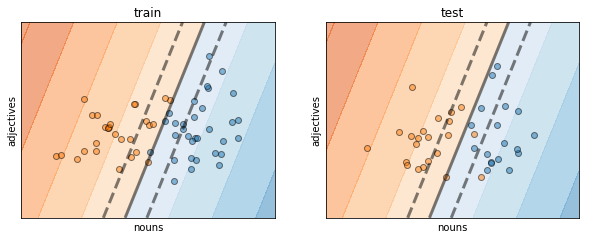

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2)
plot_boundary(ax1, classifier, test_df[['NN','JJ']], X_train_d, y_train_d, "train")
plot_boundary(ax2, classifier, test_df[['NN','JJ']], X_test_d, y_test_d, "test")